# Regression Modelling

In [27]:
import numpy as np
import pandas as pd 
df = pd.read_csv("../data/COMP1801_Coursework_Dataset_Corrected.csv")
df.shape
df.head()

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,1107.81,Valve,singleGrain,27,2.64,8.08,23.35,60.65,19.76,15.18,4.41,7,0,0,Top,Investment
1,1226.13,Valve,colGrain,24,4.06,1.11,24.98,52.47,31.63,12.32,3.58,30,1,0,Top,Continuous
2,1914.12,Blade,singleGrain,20,4.36,8.54,34.71,60.98,26.56,11.60,0.86,22,0,0,Bottom,Continuous
3,1240.83,Valve,singleGrain,14,3.59,8.83,21.61,54.13,26.71,17.81,1.35,10,0,0,Bottom,Continuous
4,1599.40,Nozzle,singleGrain,22,3.06,3.04,29.65,62.88,24.06,12.08,0.98,21,0,0,Top,Investment


### Now we will split the dataset into train data and test data:

1. Train data contains **80%** of the dataset for training
2. Test data contains **20%** of the dataset purely for testing 

In [28]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Lifespan'])
y = df['Lifespan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)
print(f"size of X_train is :{X_train.shape} and that of X_test is :{X_test.shape}")
print(f"size of y_train is :{y_train.shape} and that of y_test is :{y_test.shape}")

size of X_train is :(800, 15) and that of X_test is :(200, 15)
size of y_train is :(800,) and that of y_test is :(200,)


### Encoding features:

For encoding purpose I will choose OneHotEncoder to avoid imposing a false numerical order, which is a risk with the LabelEncoder.

In [29]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

In [30]:
# grouping numerical and categorical feature columns

cat_col = X_train.select_dtypes(include=['object','category']).columns.tolist()
num_col = X_train.select_dtypes(include=['int64','float64']).columns.tolist()

print(cat_col)
print(num_col)

['partType', 'microstructure', 'seedLocation', 'castType']
['coolingRate', 'quenchTime', 'forgeTime', 'HeatTreatTime', 'Nickel%', 'Iron%', 'Cobalt%', 'Chromium%', 'smallDefects', 'largeDefects', 'sliverDefects']


In [31]:
# create preprocessing pipelines for each data type

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

# Create preprocessing pipelines for each data type
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_col),
        ('cat', categorical_transformer, cat_col)
    ],
    remainder='passthrough'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

num_feature_names = num_col
cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_col)

all_feature_names = list(num_feature_names) + list(cat_feature_names)

X_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=all_feature_names, index=X_train.index)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=all_feature_names, index=X_test.index)

print(f"Original shape: {X_train.shape}")
print(f"Preprocessed shape: {X_train_preprocessed.shape}")
print(f"\nFeature names after preprocessing:\n{all_feature_names}")

Original shape: (800, 15)
Preprocessed shape: (800, 23)

Feature names after preprocessing:
['coolingRate', 'quenchTime', 'forgeTime', 'HeatTreatTime', 'Nickel%', 'Iron%', 'Cobalt%', 'Chromium%', 'smallDefects', 'largeDefects', 'sliverDefects', 'partType_Blade', 'partType_Block', 'partType_Nozzle', 'partType_Valve', 'microstructure_colGrain', 'microstructure_equiGrain', 'microstructure_singleGrain', 'seedLocation_Bottom', 'seedLocation_Top', 'castType_Continuous', 'castType_Die', 'castType_Investment']


---

### Linear Regression Modelling:

1. Now let us start with modelling our data with a linear regression model that tries to fit a linear line to the training data. 
2. This serves as a baseline for our final model which should outperform this model.
3. This helps us identify if our model is learning anything at all.

In [32]:
from sklearn.dummy import DummyRegressor 
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVR 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("\n"+"="*70)
print("Model Training - Linear Regression")
print("="*70)

lr_model = LinearRegression()

lr_model.fit(X_train_preprocessed, y_train)

y_train_lr = lr_model.predict(X_train_preprocessed)
y_test_lr = lr_model.predict(X_test_preprocessed)

lr_train_r2 = r2_score(y_train, y_train_lr)
lr_test_r2 = r2_score(y_test, y_test_lr)
lr_test_mse = mean_squared_error(y_test, y_test_lr)
lr_test_mae = mean_absolute_error(y_test, y_test_lr)

print(f"\nLinear Regression Performance:")
print(f"  Train R²: {lr_train_r2:.4f}")
print(f"  Test R²:  {lr_test_r2:.4f}")
print(f"  Test MSE: {lr_test_mse:.4f}")
print(f"  Test MAE: {lr_test_mae:.4f}")


Model Training - Linear Regression

Linear Regression Performance:
  Train R²: 0.1978
  Test R²:  0.2133
  Test MSE: 89275.5869
  Test MAE: 254.0407


#### Key takeaways of Linear Regression model:

1. R2 score: model socres 0.1978 that means it can hardly explain any variance at all since it tries to fit a line to a dataset that is **non-linear** in nature
2. MSE and MAE tell us that the model is missing non-linear patterns
3. **Non-linear** models are necessary to capture non-linear relationships in the dataset

### Modelling with Support Vector Regressor (SVR)

In [34]:
svr_params = {
    'C': [0.1, 1, 10, 100, 150, 200],
    'kernel':['linear','rbf','poly'],
    'epsilon':[0.01, 0.1, 0.5]
}

svr_model = SVR()

svr_grid_search = GridSearchCV(
    estimator=svr_model,
    param_grid=svr_params,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

print("\nTraining SVR with GridSearchCV....")
svr_grid_search.fit(X_train_preprocessed, y_train)

# best SVR model
best_svr_model = svr_grid_search.best_estimator_

print(f"\nBest SVR Hyperparameters: {svr_grid_search.best_params_}")
print(f"Best CV R² Score: {svr_grid_search.best_score_:.4f}")

# Make predictions with best SVR
y_train_svr = best_svr_model.predict(X_train_preprocessed)
y_test_svr = best_svr_model.predict(X_test_preprocessed)

# Evaluate SVR
svr_train_r2 = r2_score(y_train, y_train_svr)
svr_test_r2 = r2_score(y_test, y_test_svr)
svr_test_mse = mean_squared_error(y_test, y_test_svr)
svr_test_mae = mean_absolute_error(y_test, y_test_svr)

print(f"\nSVR Performance:")
print(f"  Train R²: {svr_train_r2:.4f}")
print(f"  Test R²:  {svr_test_r2:.4f}")
print(f"  Test MSE: {svr_test_mse:.4f}")
print(f"  Test MAE: {svr_test_mae:.4f}")


Training SVR with GridSearchCV....
Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best SVR Hyperparameters: {'C': 200, 'epsilon': 0.5, 'kernel': 'rbf'}
Best CV R² Score: 0.6895

SVR Performance:
  Train R²: 0.8331
  Test R²:  0.7284
  Test MSE: 30817.1237
  Test MAE: 136.5694


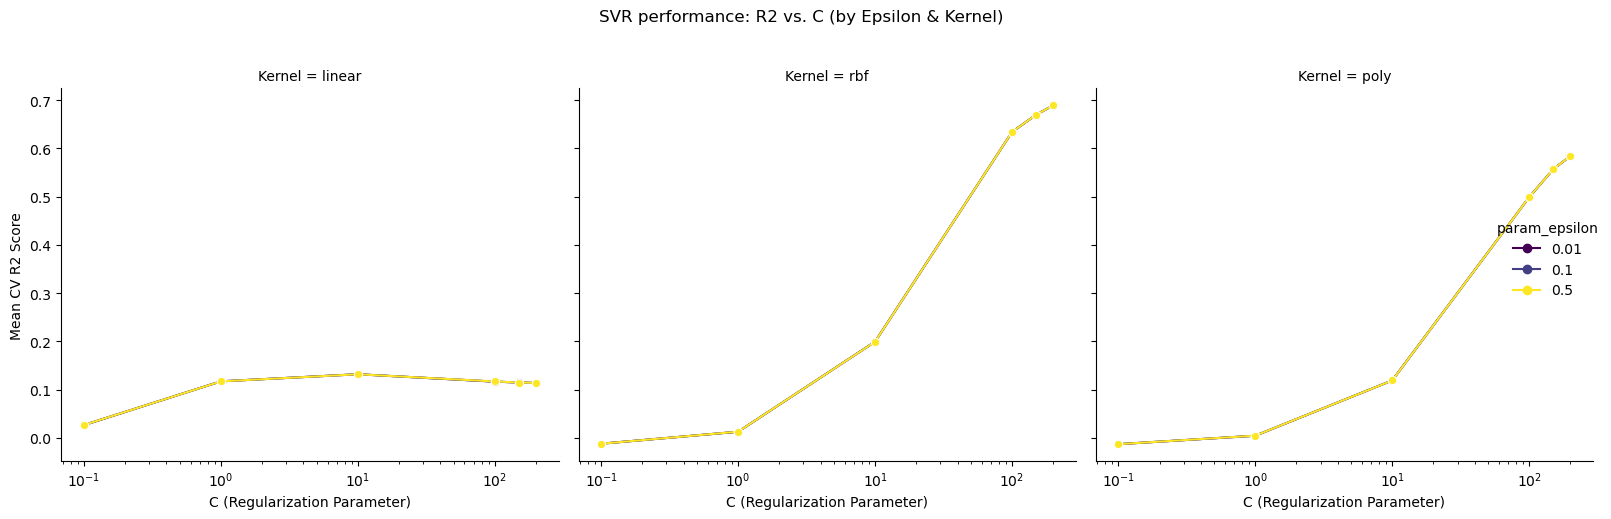

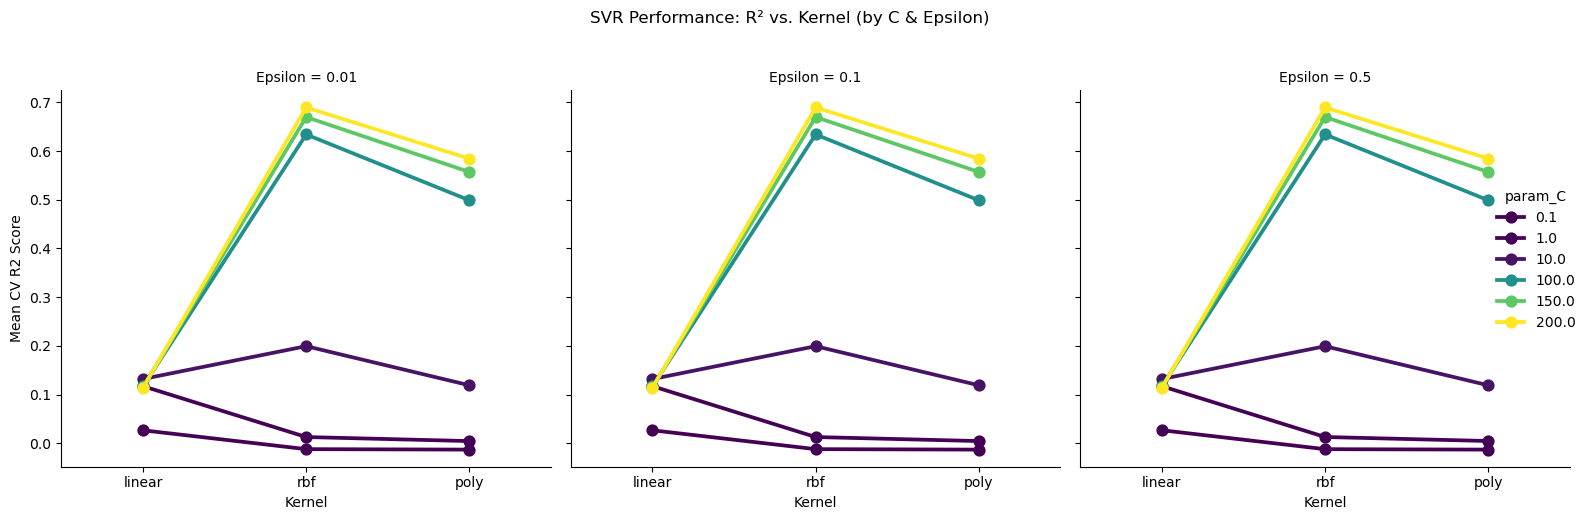

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# access the results

results_df = pd.DataFrame(svr_grid_search.cv_results_)

results_df['param_C'] = results_df['param_C'].astype(float)

g1 = sns.relplot(
    data=results_df,
    x='param_C',
    y='mean_test_score',
    hue='param_epsilon',
    col='param_kernel',
    kind='line',
    marker='o',
    palette='viridis'
)

g1.set_axis_labels("C (Regularization Parameter)", "Mean CV R2 Score")
g1.set_titles("Kernel = {col_name}")
g1.set(xscale='log')
g1.fig.suptitle("SVR performance: R2 vs. C (by Epsilon & Kernel)", y=1.03)

plt.tight_layout()
plt.savefig("../report/figures/fig-3.1-SVR-hyper-parameters-graph.png", dpi=500, bbox_inches='tight')
plt.show()


# Plot 2: Effect of Kernel and C

results_df['param_epsilon'] = results_df['param_epsilon'].astype(str)

g2 = sns.catplot(
    data=results_df,
    x='param_kernel',
    y='mean_test_score',
    hue='param_C',
    col='param_epsilon',
    kind='point',
    palette='viridis'
)

g2.set_axis_labels("Kernel", "Mean CV R2 Score")
g2.set_titles("Epsilon = {col_name}")
g2.fig.suptitle("SVR Performance: R² vs. Kernel (by C & Epsilon)", y=1.03)

plt.tight_layout()
plt.savefig("../report/figures/fig-3.2-SVR-hyper-parameters-graph.png", dpi=500, bbox_inches='tight')
plt.show()

### SVR Hyperparameter Modelling Observations:

1. The graph in fig-3.1 and fig-3.2 clearly shows us **rbf** is the superior choice achieving the highest R2 score
2. The **linear** performs poorly, just as we hypothesised in our EDA section
3. Performance of 'rbf' and 'poly' is highly dependent on C (regularization parameter), increasing the R2 score as we increase C
4.'epsilon' has does not seem to be showing any effect, Epsilon=0.5 beign the highest peak performance though

### GBR Modelling

In [36]:
# ============================================================================
# 4b. MODEL TRAINING - GRADIENT BOOSTING REGRESSOR
# ============================================================================
print("\n" + "=" * 70)
print("4. MODEL TRAINING - GBR (Gradient Boosting Regressor)")
print("=" * 70)

# Define GBR hyperparameter grid
gbr_params = {
    'n_estimators': [50, 100, 200],           # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.5],       # Learning rate
    'max_depth': [3, 5, 7],                   # Max tree depth
    'subsample': [0.8, 1.0]                  # Subsample ratio
}

# Create GBR model
gbr_model = GradientBoostingRegressor(random_state=42)

# GridSearchCV to find best hyperparameters
gbr_grid_search = GridSearchCV(
    estimator=gbr_model,
    param_grid=gbr_params,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

print("\nTraining GBR with GridSearchCV...")
gbr_grid_search.fit(X_train_preprocessed, y_train)

# Get best GBR model
best_gbr_model = gbr_grid_search.best_estimator_

print(f"\nBest GBR Hyperparameters: {gbr_grid_search.best_params_}")
print(f"Best CV R² Score: {gbr_grid_search.best_score_:.4f}")

# Make predictions with best GBR
y_train_gbr = best_gbr_model.predict(X_train_preprocessed)
y_test_gbr = best_gbr_model.predict(X_test_preprocessed)

# Evaluate GBR
gbr_train_r2 = r2_score(y_train, y_train_gbr)
gbr_test_r2 = r2_score(y_test, y_test_gbr)
gbr_test_mse = mean_squared_error(y_test, y_test_gbr)
gbr_test_mae = mean_absolute_error(y_test, y_test_gbr)

print(f"\nGBR Performance:")
print(f"  Train R²: {gbr_train_r2:.4f}")
print(f"  Test R²:  {gbr_test_r2:.4f}")
print(f"  Test MSE: {gbr_test_mse:.4f}")
print(f"  Test MAE: {gbr_test_mae:.4f}")



4. MODEL TRAINING - GBR (Gradient Boosting Regressor)

Training GBR with GridSearchCV...
Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best GBR Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best CV R² Score: 0.9852

GBR Performance:
  Train R²: 0.9979
  Test R²:  0.9874
  Test MSE: 1432.1436
  Test MAE: 30.1800


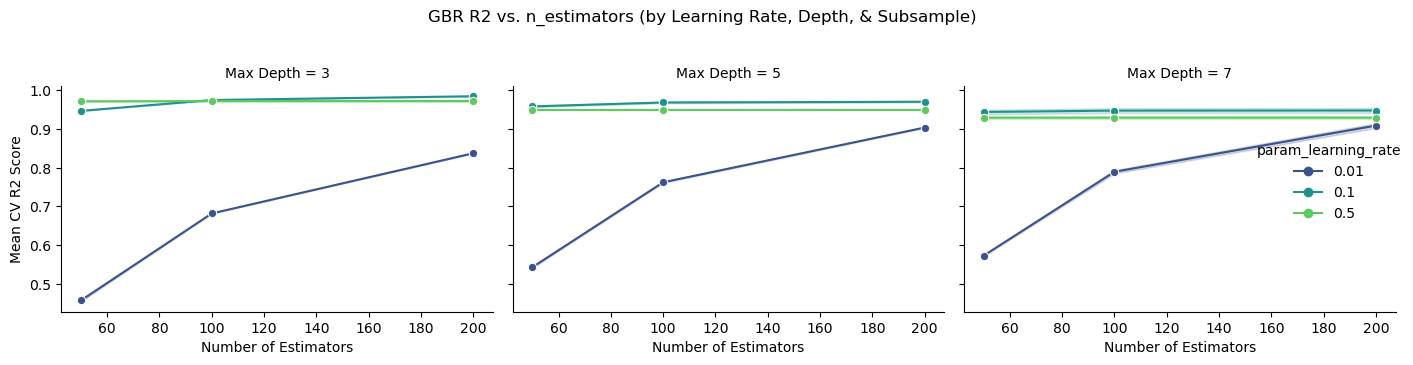

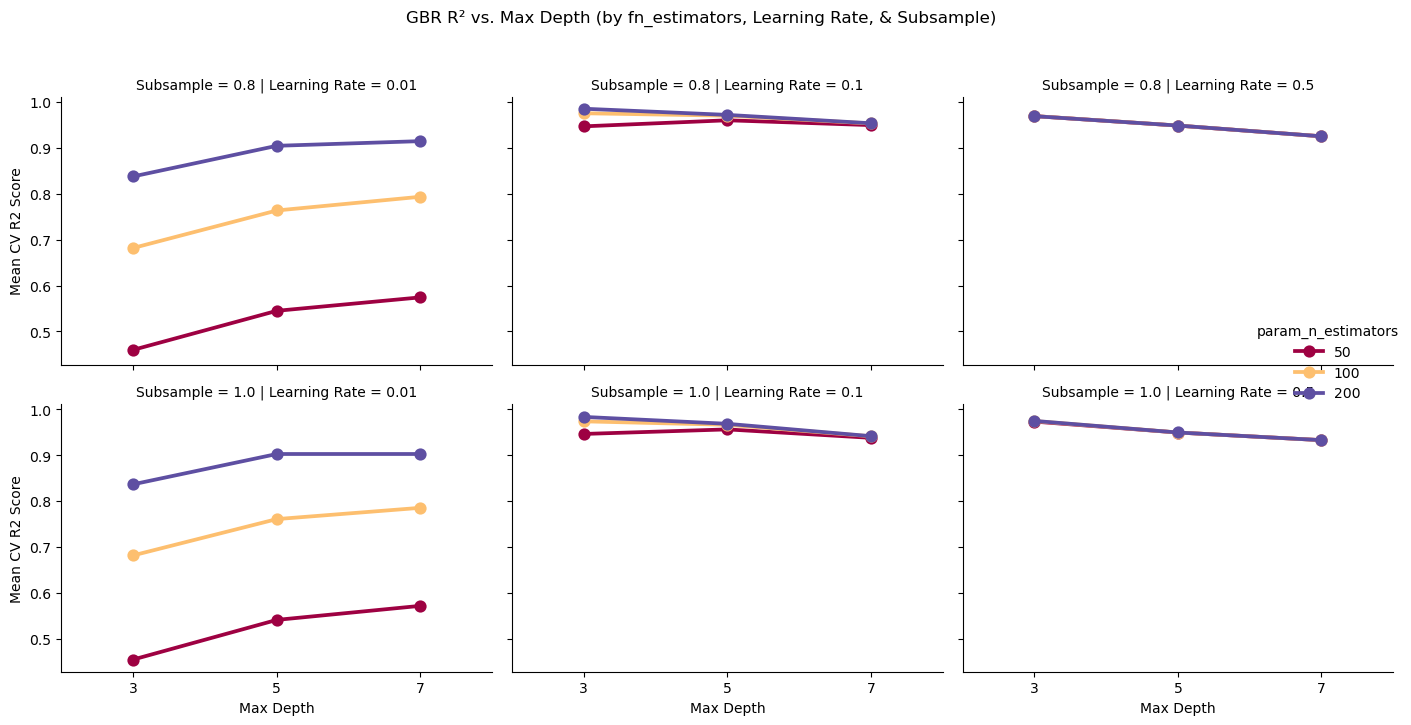

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# access the results

gbr_results_df = pd.DataFrame(gbr_grid_search.cv_results_)

gbr_results_df['param_learning_rate'] = gbr_results_df['param_learning_rate'].astype(str)
gbr_results_df['param_subsample'] = gbr_results_df['param_subsample'].astype(str)


g1 = sns.relplot(
    data=gbr_results_df,
    x='param_n_estimators',
    y='mean_test_score',
    hue='param_learning_rate',
    col='param_max_depth',
    kind='line',
    marker='o',
    palette='viridis',
    height=3.5,
    aspect=1.2
)

g1.set_axis_labels("Number of Estimators", "Mean CV R2 Score")
g1.set_titles(row_template="Subsample = {row_name}", col_template="Max Depth = {col_name}")
g1.fig.suptitle("GBR R2 vs. n_estimators (by Learning Rate, Depth, & Subsample)", y=1.03)

plt.tight_layout()
plt.savefig("../report/figures/fig-3.11-GBR-hyper-parameters-graph.png", dpi=500, bbox_inches='tight')
plt.show()


# Plot 2: max_depth Vs. R2 score

results_df['param_epsilon'] = results_df['param_epsilon'].astype(str)

g2 = sns.catplot(
    data=gbr_results_df,
    x='param_max_depth',
    y='mean_test_score',
    hue='param_n_estimators',
    col='param_learning_rate',
    row="param_subsample",
    kind='point',
    palette='Spectral',
    height=3.5,
    aspect=1.2
)

g2.set_axis_labels("Max Depth", "Mean CV R2 Score")
g2.set_titles(row_template="Subsample = {row_name}", col_template="Learning Rate = {col_name}")
g2.fig.suptitle("GBR R² vs. Max Depth (by fn_estimators, Learning Rate, & Subsample)", y=1.03)

plt.tight_layout()
plt.savefig("../report/figures/fig-3.22-GBR-hyper-parameters-graph.png", dpi=500, bbox_inches='tight')
plt.show()

### Final Model Comparison

In [38]:
import matplotlib.pyplot as plt


MODEL COMPARISON SUMMARY

             Model  Train R²  Test R²     Test MSE   Test MAE
Linear Regression  0.197801 0.213293 89275.586901 254.040735
              SVR  0.833132 0.728436 30817.123700 136.569356
              GBR  0.997910 0.987380  1432.143615  30.179950

 Best Model: GBR with Test R² = 0.9874!!!


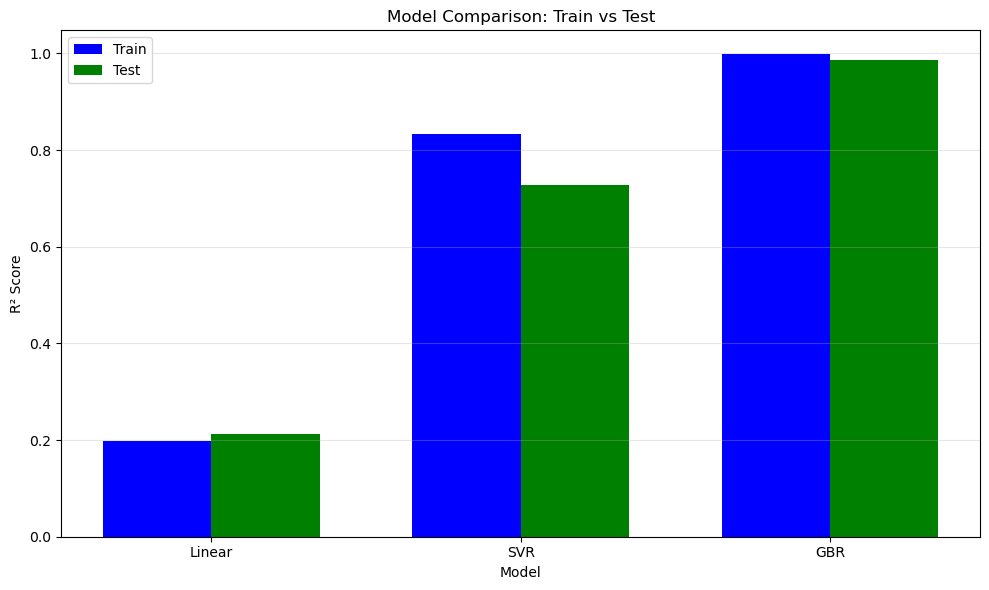

In [41]:
# ============================================================================
# MODEL COMPARISON
# ============================================================================
print("\n" + "=" * 70)
print("MODEL COMPARISON SUMMARY")
print("=" * 70)

comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'SVR', 'GBR'],
    'Train R²': [lr_train_r2, svr_train_r2, gbr_train_r2],
    'Test R²': [lr_test_r2, svr_test_r2, gbr_test_r2],
    'Test MSE': [lr_test_mse, svr_test_mse, gbr_test_mse],
    'Test MAE': [lr_test_mae, svr_test_mae, gbr_test_mae]
})

print("\n", comparison_df.to_string(index=False))


best_model_idx = comparison_df['Test R²'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_test_r2 = comparison_df.loc[best_model_idx, 'Test R²']

print(f"\n Best Model: {best_model_name} with Test R² = {best_test_r2:.4f}!!!")



models = ['Linear', 'SVR', 'GBR']

train_r2 = [lr_train_r2,
            svr_train_r2,
            gbr_train_r2]
test_r2 = [lr_test_r2,
           svr_test_r2,
           gbr_test_r2]


fig, ax = plt.subplots(figsize=(10, 6))

x = range(len(models))
width = 0.35

ax.bar([i - width/2 for i in x], train_r2, width, label='Train', color='blue')
ax.bar([i + width/2 for i in x], test_r2, width, label='Test', color='green')

ax.set_ylabel('R² Score')
ax.set_xlabel('Model')
ax.set_title('Model Comparison: Train vs Test')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig("../report/figures/fig-2.1-overfitting-check.png", dpi=500)
plt.show()

### **Modelling observations:**


#### **Support Vector Regressor (SVR):**
1. The SVR model, after hyperparameter tuning with 'GridSearchCV', found the best parameters to be {'C': 200, 'epsilon': 0.5, 'kernel': 'rbf'}, and it scores **0.7284** on test set for a R2 score
2. Although SVR is significantly better than the baseline, it shows signs of overfitting on the train data as their is a significant difference between its test and train R2 score.
3. C=200 here which is very high and this could **explain why this model is over-fitting** as it is trying hard to penalize any error


#### **Gradient Boosting Regressor (GBR):**
1. Gradient boosting regressor(GBR) significantly outshined the SVR
2. Its best hyperparameters being {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}, which gives a CV R2 score of **0.9852** 
3. Mean squared error(MSE) and Mean absolute error(MAE) both are dramatically lower as compared to the baseline and SVR
4. GBR shows minimal overfitting and good generalization 